<a href="https://colab.research.google.com/github/sauravsingla/Human-Activity-Recognition/blob/main/GRU_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
#from numpy import mean
#from numpy import std
#from numpy import dstack
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import GRU
from keras.utils import to_categorical

In [ ]:
#opening the zip-file
from zipfile import ZipFile
file_name1="UCI HAR Dataset.zip"
with ZipFile(file_name1,'r') as zip:
  zip.extractall()
  print("DONE_1")


DONE_1


In [ ]:
#those are separate normalised input features for the neural network
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]
# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [ ]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load_signals
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        #/content/UCI HAR Dataset/train/Inertial Signals
        #/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [ ]:
def load_y(subset):
    filename = f'/content/UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [ ]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, y_train, X_test,  y_test

In [ ]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
# Initializing parameters
epochs = 45
batch_size = 16
n_hidden = 32

In [ ]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Loading the train and test data
X_train, Y_train, X_test,  Y_test = load_data()

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
#n_classes be 6
print(timesteps)
print(input_dim)
print(len(X_train))
print(n_classes)

128
9
7352
6


In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(GRU(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 4,326
Trainable params: 4,326
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 #Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs,shuffle=True)


Epoch 1/45
460/460 [==============================] - 20s 44ms/step - loss: 1.2607 - accuracy: 0.4536 - val_loss: 1.1711 - val_accuracy: 0.5243
Epoch 2/45
460/460 [==============================] - 20s 44ms/step - loss: 0.9699 - accuracy: 0.5815 - val_loss: 0.8499 - val_accuracy: 0.6386
Epoch 3/45
460/460 [==============================] - 20s 43ms/step - loss: 0.6730 - accuracy: 0.7018 - val_loss: 0.6671 - val_accuracy: 0.7869
Epoch 4/45
460/460 [==============================] - 20s 44ms/step - loss: 0.4573 - accuracy: 0.8282 - val_loss: 0.6457 - val_accuracy: 0.8005
Epoch 5/45
460/460 [==============================] - 20s 43ms/step - loss: 0.3766 - accuracy: 0.8887 - val_loss: 0.5083 - val_accuracy: 0.8429
Epoch 6/45
460/460 [==============================] - 20s 44ms/step - loss: 0.3224 - accuracy: 0.8985 - val_loss: 0.4090 - val_accuracy: 0.8768
Epoch 7/45
460/460 [==============================] - 24s 52ms/step - loss: 0.2741 - accuracy: 0.9089 - val_loss: 0.3793 - val_accuracy:

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
pred = np.argmax(Y_pred,axis = 1) 
Y_actual = np.argmax(Y_test,axis = 1)

In [ ]:
confusion_matrix=confusion_matrix(Y_actual, pred)

In [ ]:
print(confusion_matrix)

[[467   2  27   0   0   0]
 [ 10 454   7   0   0   0]
 [  4   0 416   0   0   0]
 [  0   5   4 397  85   0]
 [  9   1   2 100 420   0]
 [  0   0   0   0   0 537]]


In [ ]:
print(classification_report(Y_actual, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       496
           1       0.98      0.96      0.97       471
           2       0.91      0.99      0.95       420
           3       0.80      0.81      0.80       491
           4       0.83      0.79      0.81       532
           5       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.92      0.91      2947
weighted avg       0.91      0.91      0.91      2947



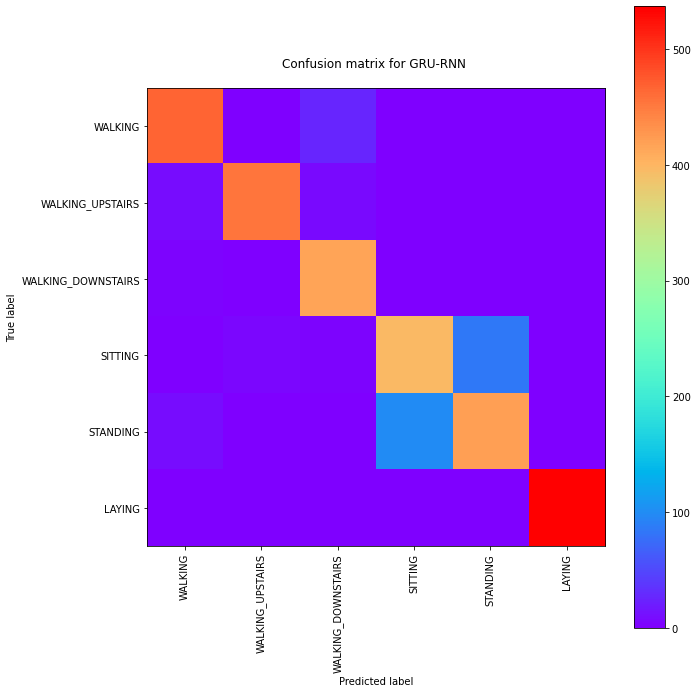

In [ ]:
#visualiZation of the result


#print("Testing Accuracy: {}%".format(100*accuracy))

#print("")
#print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
#print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
#print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))
#normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100
#print("Confusion matrix (normalised to % of total test data):")
#print(normalised_confusion_matrix)

width = 10
height = 10
plt.figure(figsize=(width, height))
plt.imshow(
    confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix for GRU-RNN \n")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()